# **Simple Analysis using Pandas Module and Plotly (Revision) (Part 2)**
## Simple tips when using Google Colab/Jupyter
- ctrl + enter, To run for a cell
- shift + enter, Add new cell
- ctrl + /, To comment a code
- ctrl + F10, To run all cells after selected column
- ctrl + F9, To run all cells

### How to download datasets from Kaggle through Google Colab

- link 1: https://stackoverflow.com/questions/49310470/using-kaggle-datasets-in-google-colab

- link 2: https://colab.research.google.com/drive/1DofKEdQYaXmDWBzuResXWWvxhLgDeVyl#scrollTo=8FgC4GlvHZQ1

### How to read csv file from PC (or any sources) through Google Colab
- link 1: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=JiJVCmu3dhFa
- link 2: https://stackoverflow.com/questions/48340341/how-to-read-csv-to-dataframe-in-google-colab

In [2]:
import pandas as pd
import plotly.express as px

#### For this analysis, I used a different method where I read the data from local machine(PC). In previous analysis, I directly downloaded and read the data from kaggle.

> Indented block



`uploaded = files.upload()` -> make sure to create a variable to hide the result  

*(Previously, I directly wrote `files.upload()` and the result showed was so messy)*.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving modified-data.csv to modified-data.csv


In [4]:
# To check list of uploaded or downloaded data
!ls

modified-data.csv  sample_data


In [5]:
dataset = pd.read_csv("modified-data.csv")
dataset.head()

,Unnamed: 0,City,State,Country,AirQuality,WaterPollution
0,0,New York City,New York,United States of America,46.816038,49.504950
1,1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,2,San Francisco,California,United States of America,60.514019,43.000000
3,3,Berlin,Berlin,Germany,62.364130,28.612717
4,4,Los Angeles,California,United States of America,36.621622,61.299435


In [6]:
# Checking data types for each column.
dataset.dtypes

Unnamed: 0          int64
City               object
State              object
Country            object
AirQuality        float64
WaterPollution    float64
dtype: object

#### Indicator: 
- Air quality varies from 0 (bad quality) to 100 (top good quality)

- Water pollution varies from 0 (no pollution) to 100 (extreme pollution)

In [7]:
# Simple data exploratory analysis
dataset.describe()

,Unnamed: 0,AirQuality,WaterPollution
count,3963.000000,3963.000000,3963.000000
mean,1981.000000,62.253452,44.635372
std,1144.163887,30.944753,25.663910
min,0.000000,0.000000,0.000000
25%,990.500000,37.686567,25.000000
50%,1981.000000,69.444444,50.000000
75%,2971.500000,87.500000,57.719393
max,3962.000000,100.000000,100.000000


In [8]:
"""
To check unique value. The best function to find and define the best categories.
use dataset['column_name'].unique() to show all values
use dataset.nunique() to count all the uniques values 
"""
dataset.nunique()

Unnamed: 0        3963
City              3796
State             1573
Country            177
AirQuality         667
WaterPollution     561
dtype: int64

In [9]:
# To display all columns names
dataset.columns

Index(['Unnamed: 0', 'City', 'State', 'Country', 'AirQuality',
       'WaterPollution'],
      dtype='object')

================================================================================
### Inplace is True Parameter
inplace = True -> saving any changed data

has similar function with `dataset = dataset.drop(columns = 'columns_to_drop')`


*WARNING*

*Using inplace sometimes return error. Make sure you do not run cell that has inplace many times.*

In [10]:
# To drop any unnecessary columns
dataset.drop(columns = 'Unnamed: 0', inplace = True) 


================================================================================

### New Data

Below, a new value, water quality, was created to build relevant data analysis. Water Quality is opposite of water pollution where its value came from the subtraction of 100.

Best practice is to apply lambda. In this case, we can simplify the calculation without lambda

In [11]:
dataset['WaterQuality'] = 100 - dataset['WaterPollution'] 

dataset.reindex(columns = ['City', 'State', 'Country', 'AirQuality','WaterQuality', 'WaterPollution'])

,City,State,Country,AirQuality,WaterQuality,WaterPollution
0,New York City,New York,United States of America,46.816038,50.495050,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,50.892857,49.107143
2,San Francisco,California,United States of America,60.514019,57.000000,43.000000
3,Berlin,Berlin,Germany,62.364130,71.387283,28.612717
4,Los Angeles,California,United States of America,36.621622,38.700565,61.299435
...,...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,91.666667,8.333333
3960,Vic,Catalonia,Spain,100.000000,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,100.000000,0.000000


### Make a copy using copy() Function
For the best practice, please make a backup data for any changes made.

In [12]:
dataset_copy = dataset.copy()
dataset_copy.head(5)

,City,State,Country,AirQuality,WaterPollution,WaterQuality
0,New York City,New York,United States of America,46.816038,49.504950,50.495050
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143,50.892857
2,San Francisco,California,United States of America,60.514019,43.000000,57.000000
3,Berlin,Berlin,Germany,62.364130,28.612717,71.387283
4,Los Angeles,California,United States of America,36.621622,61.299435,38.700565


### GROUP BY AND AGGREGATE METHOD
There are two method that were used by me to analyse data based on categories. 
Groupby function must be used with another function to generate the result, either we use it together with pandas math function (eg. `mean(), sum(), max()`...) or pandas aggregate function `agg()`

Example:

- `df.groupby("category_column").mean()` -> Display all column

- `df.groupby('category_column').agg({'category_column': 'mean'})` -> Only display selected column

Other way:
- `df.groupby('category_column').transform('mean')`

##### *Read Pandas documentation to understand its parameter*

#### Another way to use group by:
- `df.groupby('column_name(obj)')['column_name(int)'].mean()` or `df.groupby('column_name(obj)')['column_name(int)'].agg('mean')` -> Display data integer/float for each category
- `df.groupby('column_name').get_group('value_name')` -> Get data with specific value name
- `df.groupby('column_name').groups()` -> Display key and value (Dictionary Format)

In [13]:
#dataset_copy.sort_values(by = ['AirQuality', 'WaterPollution'], ascending = False).head(20)
dataset_copy.groupby("Country").agg({"AirQuality":"mean"}).sort_values( by = 'AirQuality' , ascending = False).head(10)

,AirQuality
Country,
Federated States of Micronesia,100.000000
Eritrea,100.000000
Palau,100.000000
Finland,95.771386
Estonia,94.190796
Eswatini,93.750000
Norway,88.684587
Barbados,88.333333
Liechtenstein,87.500000


## Data Analysis and Result

Next, we are going to read the data. This was how I able to produce the best result. 

This step, my objective was to get the cleanest country based on Air Quality and Water Quality. To achieve this objective, we can arrange the data in descending order to get the highest value or score. We can use head() function to limit the rows. In this case, I limited the data into 10 rows. Now, we achieved top 10 the cleanest country in the world.

In [15]:
dataset_copy["AverageQualityScore"] = (dataset_copy['AirQuality'] + dataset_copy['WaterQuality'])/ 2
dataset_copy.groupby("Country").mean().sort_values(by = 'AverageQualityScore' ,ascending = False).head(10)

,AirQuality,WaterPollution,WaterQuality,AverageQualityScore
Country,,,,
Palau,100.000000,0.000000,100.000000,100.000000
Liechtenstein,87.500000,0.000000,100.000000,93.750000
Finland,95.771386,19.231145,80.768855,88.270120
Eritrea,100.000000,25.000000,75.000000,87.500000
Estonia,94.190796,28.313349,71.686651,82.938723
Sweden,82.938708,18.842412,81.157588,82.048148
Latvia,84.517268,21.131815,78.868185,81.692727
Turkmenistan,80.555556,18.055556,81.944444,81.250000
Norway,88.684587,26.712641,73.287359,80.985973


In [16]:
data_vis = dataset_copy.groupby("Country", as_index = False).mean().sort_values(by = 'AverageQualityScore' ,ascending = False).head(10)
data_vis

,Country,AirQuality,WaterPollution,WaterQuality,AverageQualityScore
115,Palau,100.000000,0.000000,100.000000,100.000000
85,Liechtenstein,87.500000,0.000000,100.000000,93.750000
50,Finland,95.771386,19.231145,80.768855,88.270120
44,Eritrea,100.000000,25.000000,75.000000,87.500000
45,Estonia,94.190796,28.313349,71.686651,82.938723
149,Sweden,82.938708,18.842412,81.157588,82.048148
80,Latvia,84.517268,21.131815,78.868185,81.692727
163,Turkmenistan,80.555556,18.055556,81.944444,81.250000
112,Norway,88.684587,26.712641,73.287359,80.985973
150,Switzerland,82.955762,22.089957,77.910043,80.432902


### Data Visualization and Analysis

The most important thing in data visualization is choosing the accurate graphs or figures. To create an effective story and support our point, we need to choose a graph that is appropriate for the data. we also need to use the best color to present the data.

In this analysis, I have applied 3 ways to present the data using pandas plot, plotly and seaborn in bar chart. 



###### *Noted: Pandas plot is based on Matplotlib*


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fde36964750>],
      dtype=object)

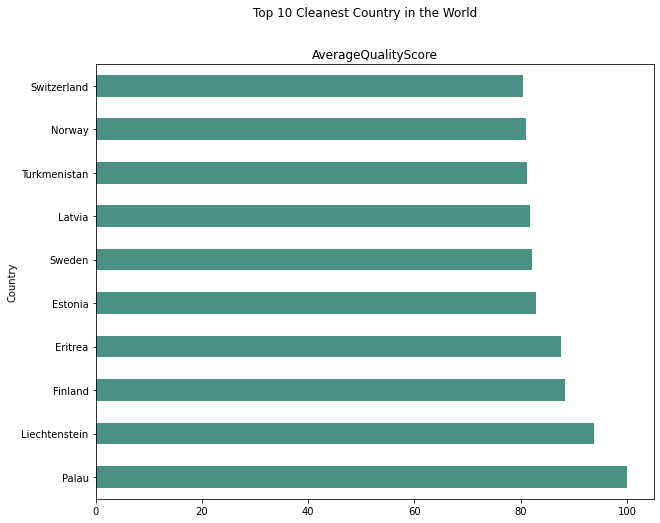

In [23]:
data_vis.plot.barh(x = 'Country', y = 'AverageQualityScore', color = '#4c9085', figsize=(10,8), subplots = True, legend = False, title = "Top 10 Cleanest Country in the World")

In [18]:
fig = px.bar(data_vis, y = 'AverageQualityScore',x = "Country", title = "Top 10 Cleanest Country in the World", color = "AverageQualityScore")
fig.show()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Matplotlib Colormaps
- https://matplotlib.org/stable/tutorials/colors/colormaps.html 

Text(0.5, 0, 'Average Quality Score (Higher is better)')

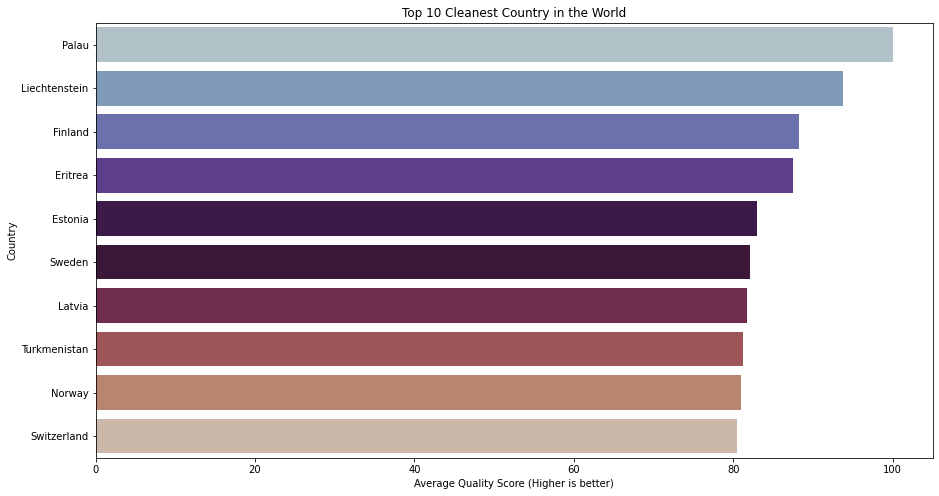

In [20]:
plt.figure(figsize = (15,8))
sns.barplot(x = "AverageQualityScore", y = "Country", data = data_vis, palette = "twilight")
plt.title("Top 10 Cleanest Country in the World")
plt.xlabel('Average Quality Score (Higher is better)')

### Summary

Based on result, Palau is top 1 cleanest country in the world. Both water Quality and Air Quality showed perfect score 100 percent. 

=============================================================================
# STATISTIC PROCESS
### Data Cleaning and Data Normalization (Outlier)

What is outlier in statistic?
According to Wikipedia, an outlier is a data point that differs significantly from other observations. An outlier can cause serious problems in statistical analyses.

There are two common ways to handle outlier either we have to remove it or adjusting its value depending to situation.



### How to read Boxplot?

Boxplot helps us to see data distribution. There are 3 types of data distribution. There are Right Skewed, Left skewed or Symmetry.

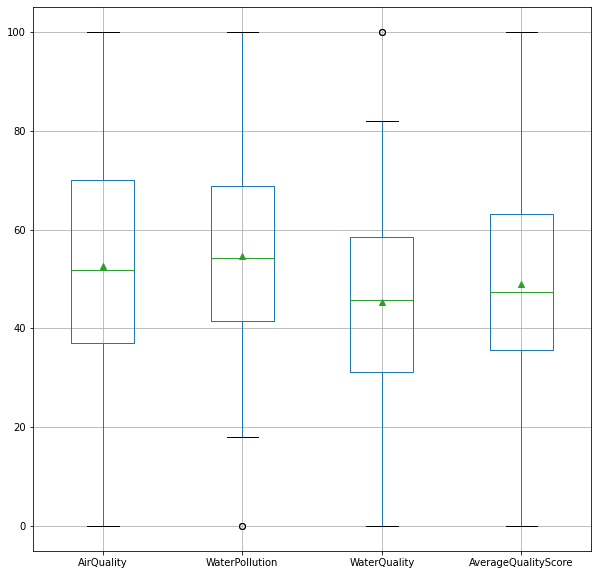

In [59]:
from matplotlib.cbook import boxplot_stats
data_cleaning = dataset_copy.groupby("Country").mean().sort_values(by = 'AverageQualityScore' ,ascending = False)

data_cleaning.boxplot(figsize=(10,10),showmeans = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde2fda2150>,
      dtype=object)

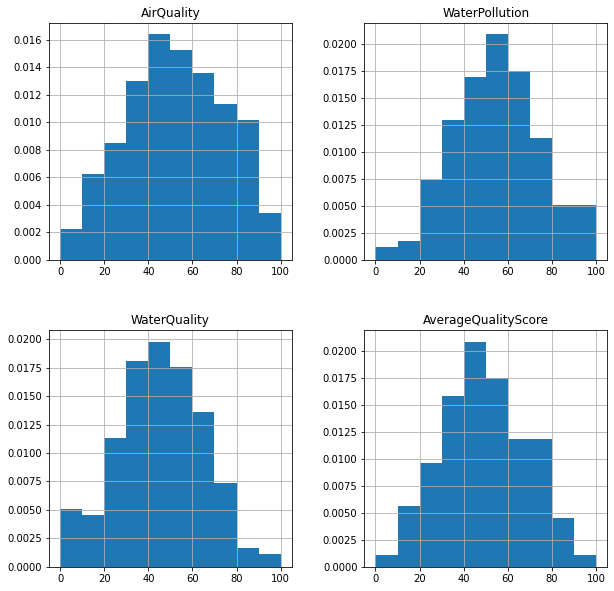

In [79]:
data_cleaning.hist(figsize = (10,10), density = True)

In [61]:
boxplot_stats(data_cleaning.values)


[{'mean': 52.66953383270452,
  'iqr': 32.79699794045629,
  'cilo': 48.00330274500558,
  'cihi': 55.743946979966914,
  'whishi': 100.0,
  'whislo': 0.0,
  'fliers': array([], dtype=float64),
  'q1': 37.1415231579775,
  'med': 51.873624862486245,
  'q3': 69.9385210984338},
 {'mean': 54.74470596980045,
  'iqr': 27.34375,
  'cilo': 51.00026023081885,
  'cihi': 57.45384604937439,
  'whishi': 100.0,
  'whislo': 18.055555555555554,
  'fliers': array([0., 0.]),
  'q1': 41.40625,
  'med': 54.22705314009662,
  'q3': 68.75},
 {'mean': 45.25529403019956,
  'iqr': 27.34375,
  'cilo': 42.54615395062561,
  'cihi': 48.99973976918115,
  'whishi': 81.94444444444444,
  'whislo': 0.0,
  'fliers': array([100., 100.]),
  'q1': 31.25,
  'med': 45.77294685990338,
  'q3': 58.59375},
 {'mean': 48.96241393145204,
  'iqr': 27.520049395049398,
  'cilo': 44.05768956566883,
  'cihi': 50.552885012593215,
  'whishi': 100.0,
  'whislo': 0.0,
  'fliers': array([], dtype=float64),
  'q1': 35.61126373626374,
  'med': 47.3

In [21]:
dataset_copy.to_csv("cleaned_dataset.csv")
files.download("cleaned_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>